## Human proteome distribution

The goal of this notebook is to get a sense of the distribution of our potential inflammation-related traits of interest across the entire human proteome.
The notebook pulls in metadata from three sources to determine whether a given human gene is extracellular, whether it's expressed by immune cells/tissues, and whether the orthologous gene in mice has an immune phenotype.
This information is based on UniProt canonical human protein annotations, the Human Protein Atlas, and mouse phenotypes annotated in OpenTargets.
This notebook highlights the genes that meet all three criteria.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
from upsetplot import UpSet

In [11]:
metadata = pd.read_csv(snakemake.input[0], low_memory=False)

##### Look at distribution of human proteins that we classified as extracellular vs. not 

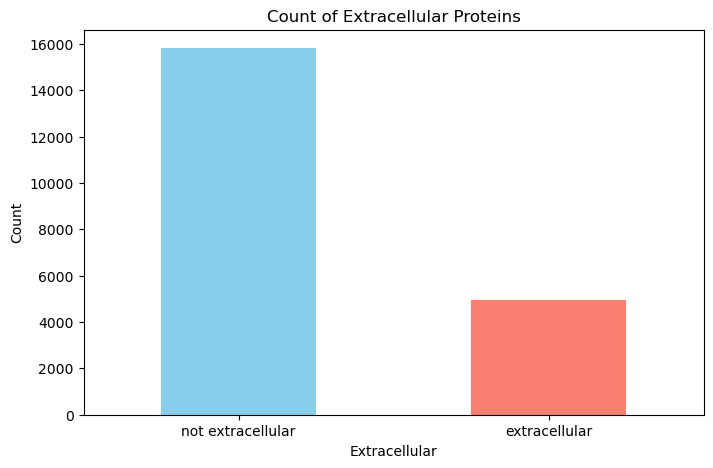

In [12]:
extracellular_counts = metadata['any_extracellular_location'].value_counts()

plt.figure(figsize=(8, 5))
extracellular_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Count of Extracellular Proteins')
plt.xlabel('Extracellular')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

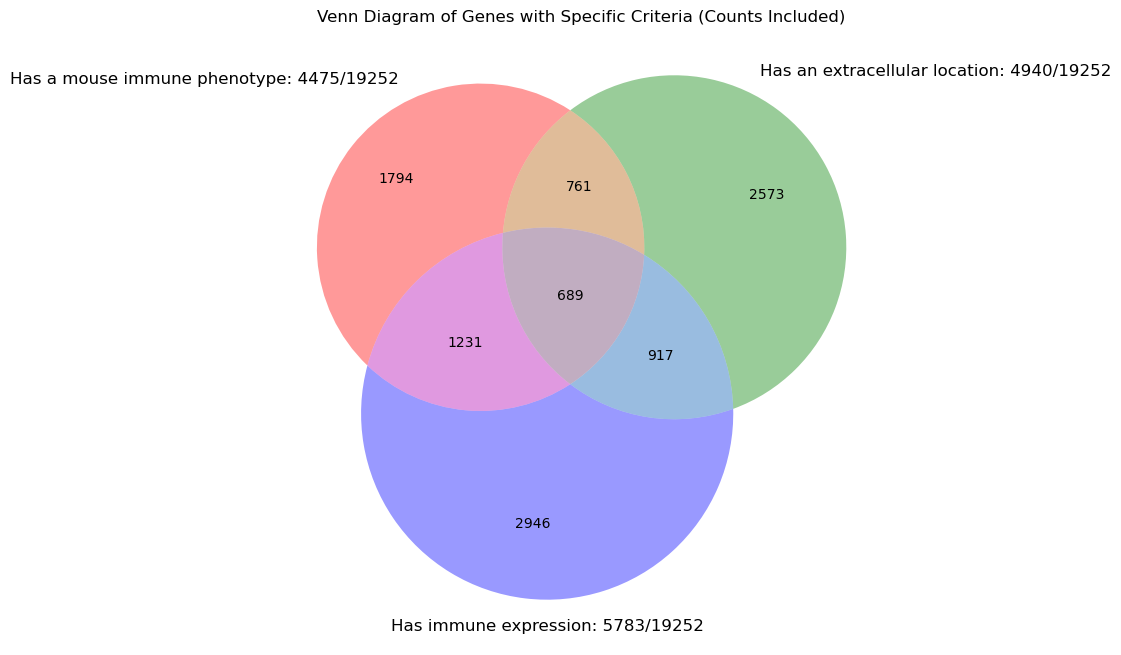

In [15]:
immune_mousephe_yes = set(metadata[metadata['mouse_immune_phenotype'] == 'mouse immune phenotype']['uniprot'])
extracellular_combined_yes = set(metadata[metadata['any_extracellular_location'] == 'extracellular']['uniprot'])
immune_expression_yes = set(metadata[metadata['immune_expression'] == 'immune expression']['uniprot'])

total_genes = metadata['ensembl'].nunique()
immune_mousephe_yes_count = len(immune_mousephe_yes)
extracellular_combined_yes_count = len(extracellular_combined_yes)
immune_expression_yes_count = len(immune_expression_yes)

# Set labels with counts for the Venn diagram
immune_mousephe_label = f"Has a mouse immune phenotype: {immune_mousephe_yes_count}/{total_genes}"
extracellular_combined_label = f"Has an extracellular location: {extracellular_combined_yes_count}/{total_genes}"
immune_expression_label = f"Has immune expression: {immune_expression_yes_count}/{total_genes}"

# Plottin Venn diagram with the labels
plt.figure(figsize=(8, 8))
venn = venn3(
    [immune_mousephe_yes, extracellular_combined_yes, immune_expression_yes],
    (immune_mousephe_label, extracellular_combined_label, immune_expression_label)
)

# Add a title
plt.title("Venn Diagram of Genes with Specific Criteria (Counts Included)")
plt.show()

/Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/python3.12/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/Users/taylorreiter/miniconda3/envs/tidyjupyter/lib/python3.12/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate obj

mouse immune phenotype  any extracellular location  immune expression
False                   False                       False                9808
                                                    True                 2973
                        True                        False                2587
                                                    True                  918
True                    False                       False                1802
                                                    True                 1232
                        True                        False                 762
                                                    True                  690
dtype: int64

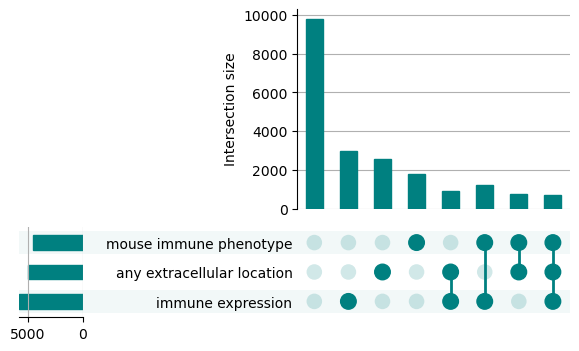

In [18]:
# Create a new DataFrame with boolean columns for each criterion
boolean_data = pd.DataFrame({
    'mouse immune phenotype': metadata['mouse_immune_phenotype'] == 'mouse immune phenotype',
    'any extracellular location': metadata['any_extracellular_location'] == 'extracellular',
    'immune expression': metadata['immune_expression'] == 'immune expression'
})

# Count the occurrences of each unique combination in the boolean DataFrame
counts = boolean_data.groupby(['mouse immune phenotype', 'any extracellular location', 'immune expression']).size()

# Set index names properly for UpSet plot compatibility
counts.index.names = ['mouse immune phenotype', 'any extracellular location', 'immune expression']

# Create the UpSet plot
upset = UpSet(counts,facecolor="teal" )
upset.plot()

counts